In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import datetime as dt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [3]:
import sklearn
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

In [4]:
def performance(actual, predicted):
    print('MAE', round(mae(actual, predicted), 3))
    print('RMSE', round(mse(actual, predicted)**0.5, 3))
    print('MAPE', round(mape(actual, predicted), 3))

In [5]:
mobile_sales = pd.read_excel('mobilesales.xlsx')

In [6]:
mobile_sales.set_index('DATE',inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


In [7]:
mobile_sales.index.dtype

dtype('<M8[ns]')

In [8]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method= 'linear')
mobile_sales.Sales

DATE
2001-01-01     6519.0
2001-02-01     6654.0
2001-03-01     7332.0
2001-04-01     7332.0
2001-05-01     8240.0
               ...   
2018-09-01    13838.0
2018-10-01    15351.0
2018-11-01    15615.0
2018-12-01    16941.0
2019-01-01    12160.0
Name: Sales, Length: 217, dtype: float64

## Clipping

In [9]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05))

In [10]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]]
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]]

## Moving Average

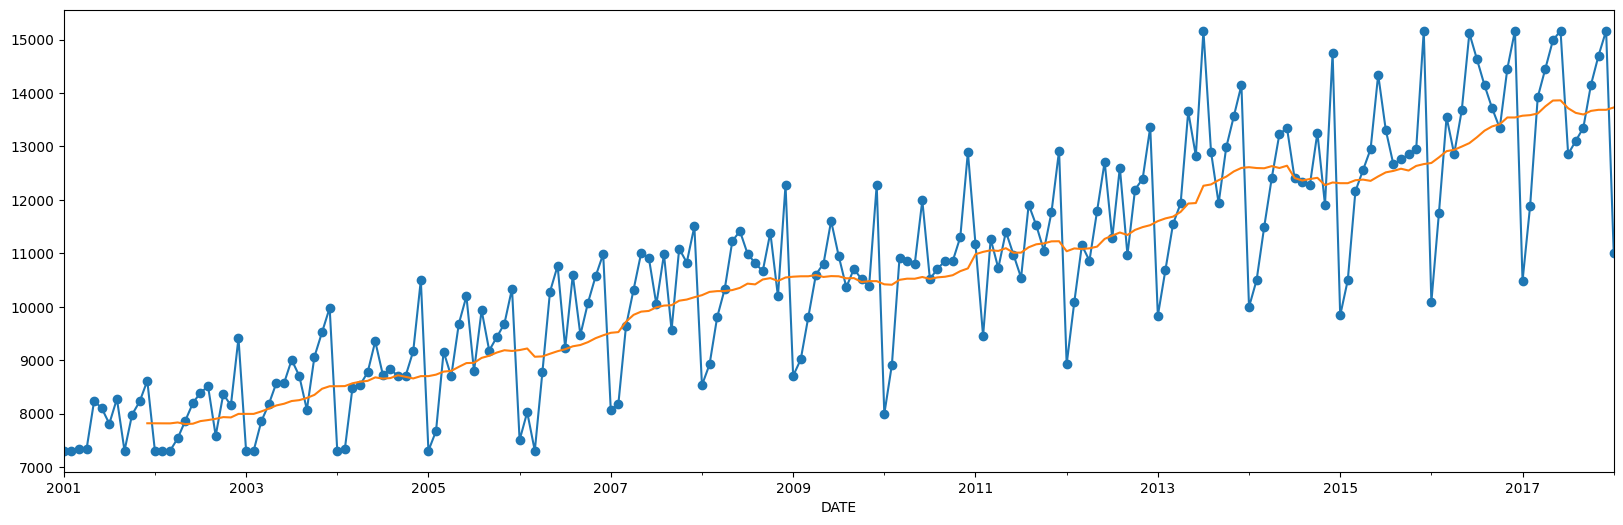

In [11]:
#Code for imputation using CENTERED moving average
#train_x.rolling(12, center=True).mean().plot();

train_x.Sales.plot(style= '-o')
train_x.Sales.rolling(12).mean().plot();

In [12]:
pred_ = train_x.Sales.copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-3:].mean())

test_x['pred'] = pred_[-12:]

C:\Users\ryanr\AppData\Local\Temp\ipykernel_25112\3823010773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = pred_[-12:]


In [13]:
pred_

array([ 7307.8       ,  7307.8       ,  7332.        ,  7332.        ,
        8240.        ,  8104.        ,  7813.        ,  8279.        ,
        7307.8       ,  7985.        ,  8229.        ,  8618.        ,
        7307.8       ,  7307.8       ,  7307.8       ,  7540.        ,
        7869.        ,  8198.        ,  8396.        ,  8510.        ,
        7589.        ,  8366.        ,  8156.        ,  9415.        ,
        7307.8       ,  7307.8       ,  7856.        ,  8181.        ,
        8581.        ,  8573.        ,  9008.        ,  8708.        ,
        8074.        ,  9068.        ,  9524.5       ,  9981.        ,
        7307.8       ,  7339.        ,  8483.        ,  8536.        ,
        8774.        ,  9355.        ,  8728.        ,  8835.        ,
        8701.        ,  8709.        ,  9170.        , 10499.        ,
        7307.8       ,  7675.        ,  9161.        ,  8699.        ,
        9682.        , 10198.        ,  8794.        ,  9935.        ,
      

MAE 1575.682
RMSE 1686.831
MAPE 0.11


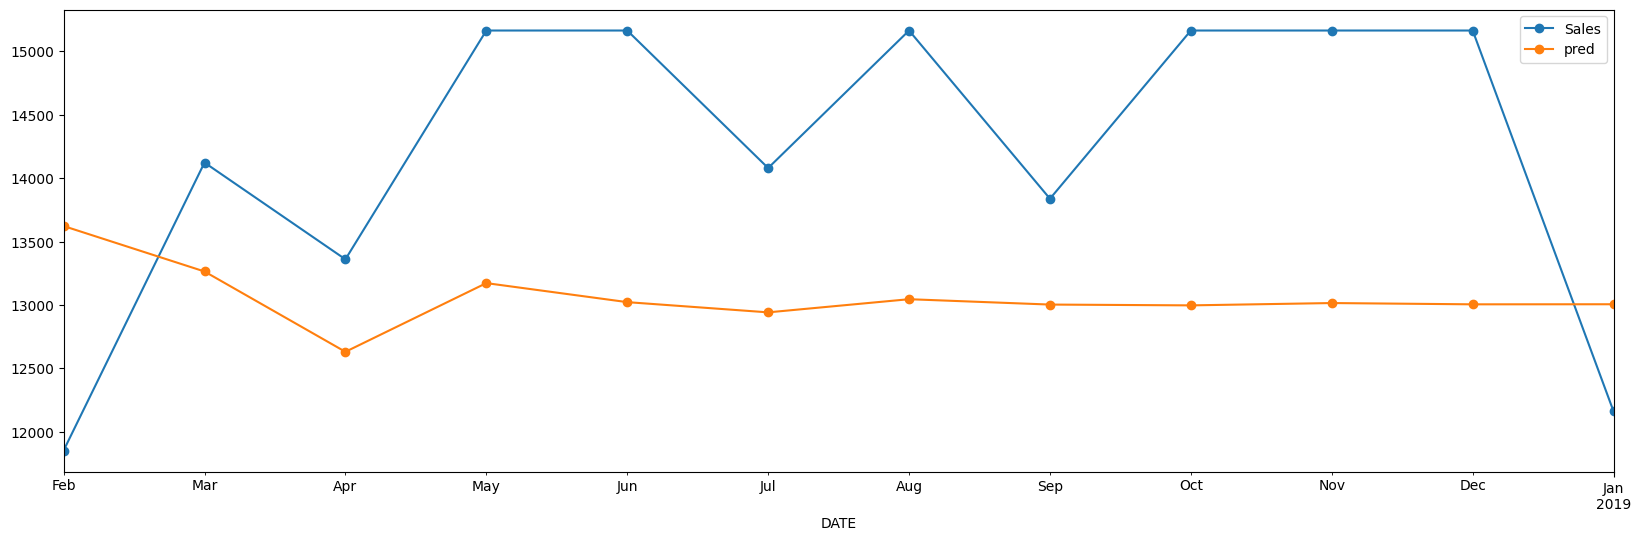

In [14]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## Simple Exponential Smoothing


In [15]:
#y_t+1_hat = alpha * y_t + (1 - alpha) * y_hat_t
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level = 0.2)
pred = model.forecast(12)

C:\Users\ryanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ryanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


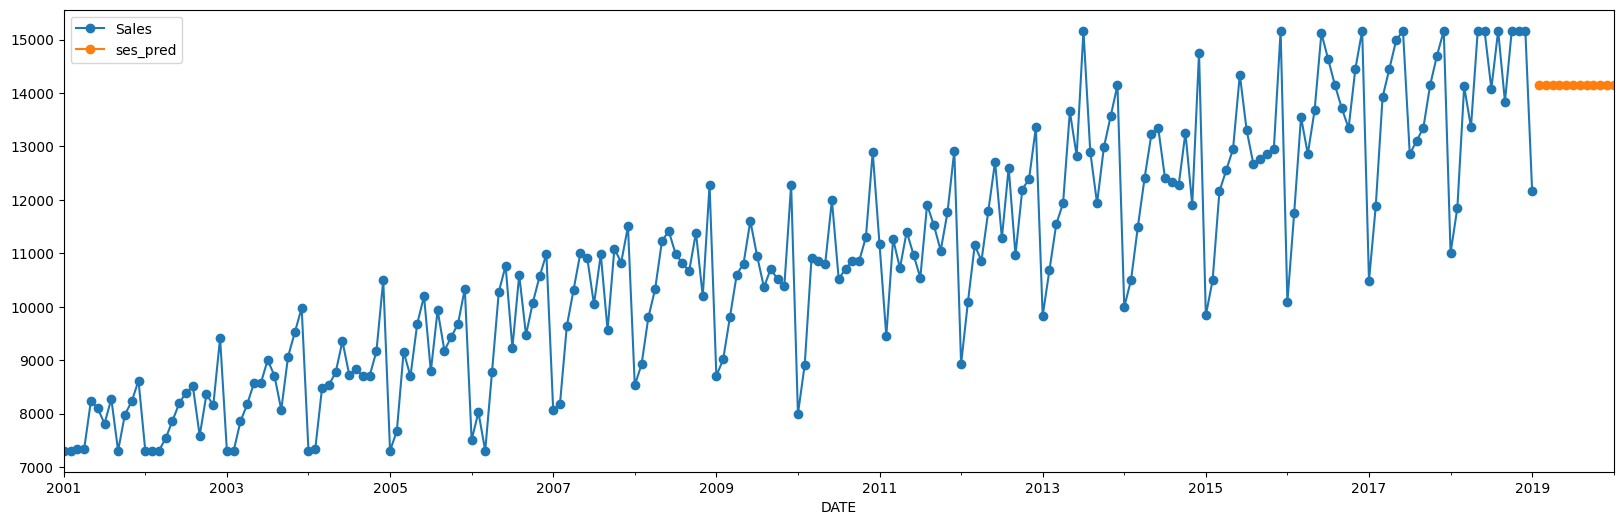

In [16]:
mobile_sales.Sales.plot(style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()

## Double Exponential Smoothing

In [17]:
# DES = SES + Drift Method (Slope method)

C:\Users\ryanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ryanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


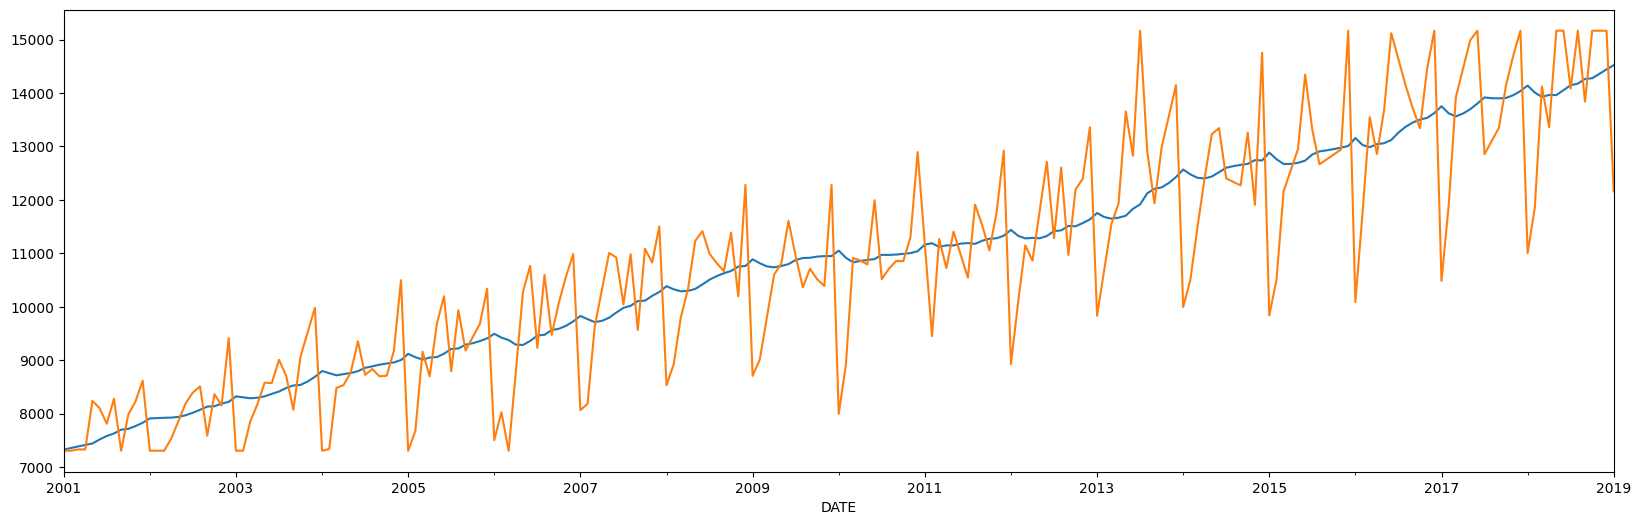

In [18]:
#trend = 'add' is used to implement DES
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label = 'original')
plt.show()

In [19]:
model.forecast(12)

2019-02-01    14432.247087
2019-03-01    14467.378026
2019-04-01    14502.508965
2019-05-01    14537.639903
2019-06-01    14572.770842
2019-07-01    14607.901781
2019-08-01    14643.032719
2019-09-01    14678.163658
2019-10-01    14713.294597
2019-11-01    14748.425535
2019-12-01    14783.556474
2020-01-01    14818.687413
Freq: MS, dtype: float64

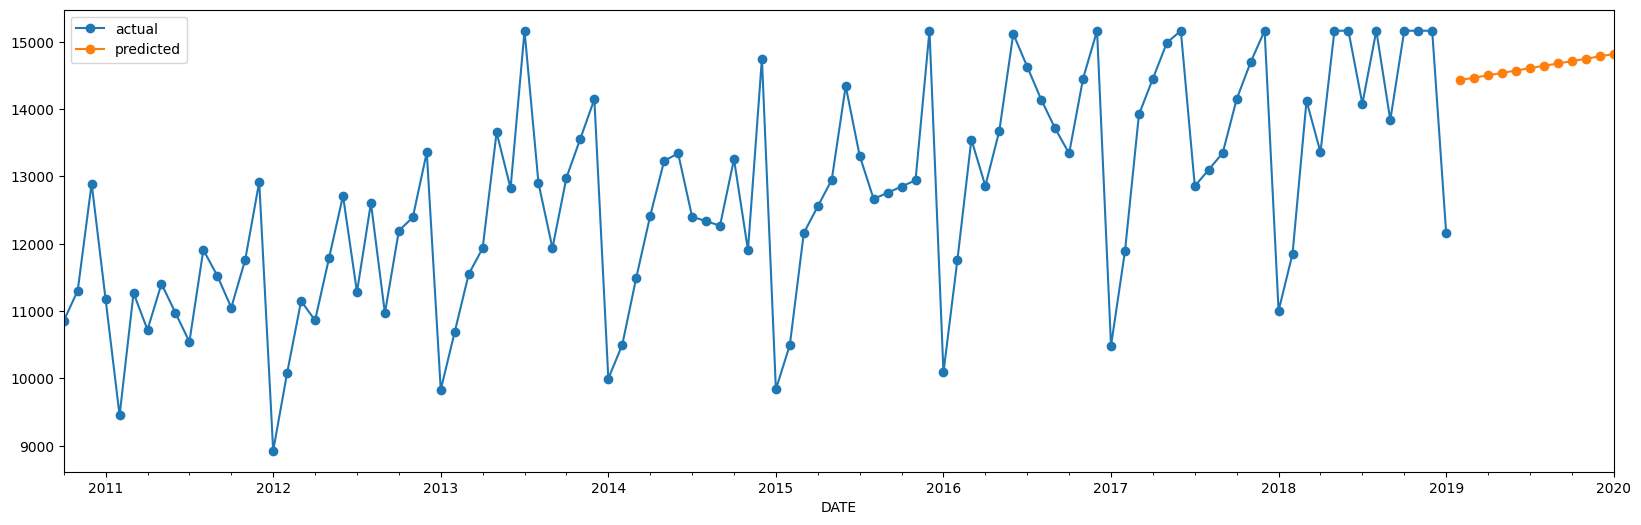

In [20]:
pred = model.forecast(12)
mobile_sales.Sales.tail(100).plot(style = '-o', label = 'actual')
pred.plot(style = '-o', label = 'predicted')
plt.legend()
 

In [21]:
pred

2019-02-01    14432.247087
2019-03-01    14467.378026
2019-04-01    14502.508965
2019-05-01    14537.639903
2019-06-01    14572.770842
2019-07-01    14607.901781
2019-08-01    14643.032719
2019-09-01    14678.163658
2019-10-01    14713.294597
2019-11-01    14748.425535
2019-12-01    14783.556474
2020-01-01    14818.687413
Freq: MS, dtype: float64

In [22]:
#Performance
test_x['pred'] = pred.values
performance(test_x['Sales'], test_x['pred'])

MAE 923.564
RMSE 1213.542
MAPE 0.07


C:\Users\ryanr\AppData\Local\Temp\ipykernel_25112\353719954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = pred.values


C:\Users\ryanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

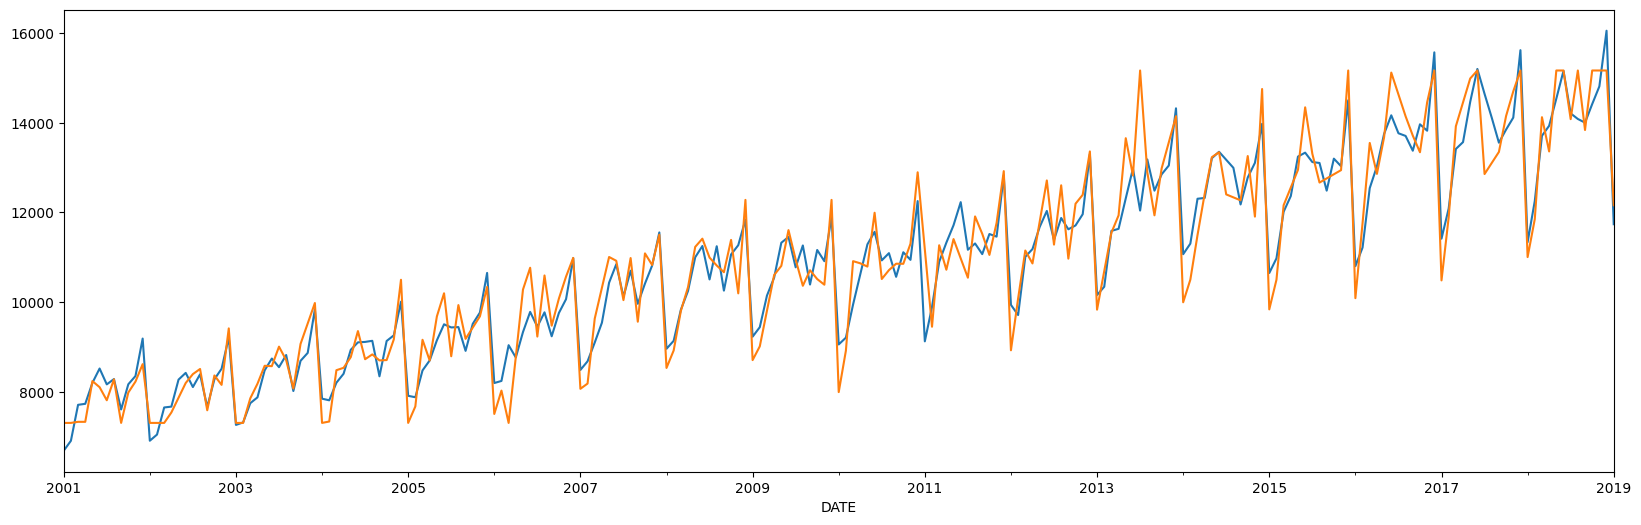

In [23]:
#seasonal = 'add' to implement TES
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend = 'add', seasonal = 'add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='actual')

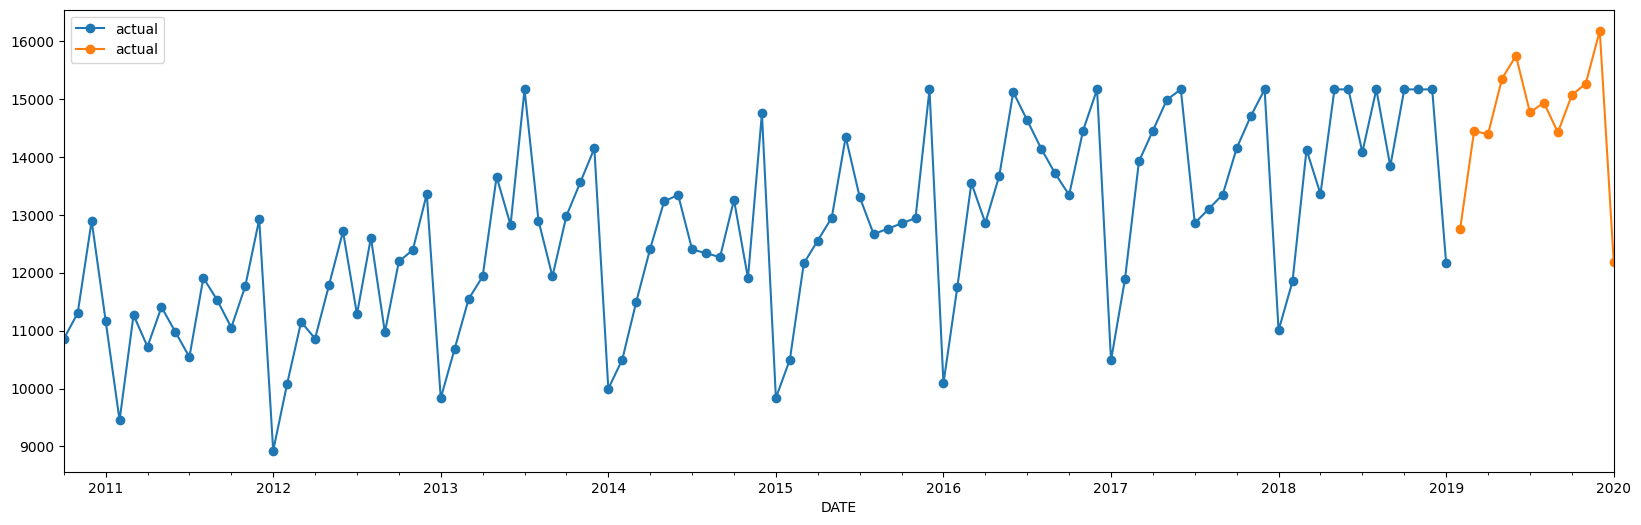

In [24]:
pred = model.forecast(12)
mobile_sales.Sales.tail(100).plot(style = '-o', label = 'actual')
pred.plot(style = '-o', label = 'actual')
plt.legend()

C:\Users\ryanr\AppData\Local\Temp\ipykernel_25112\3720904009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = pred.values


MAE 479.957
RMSE 595.569
MAPE 0.035


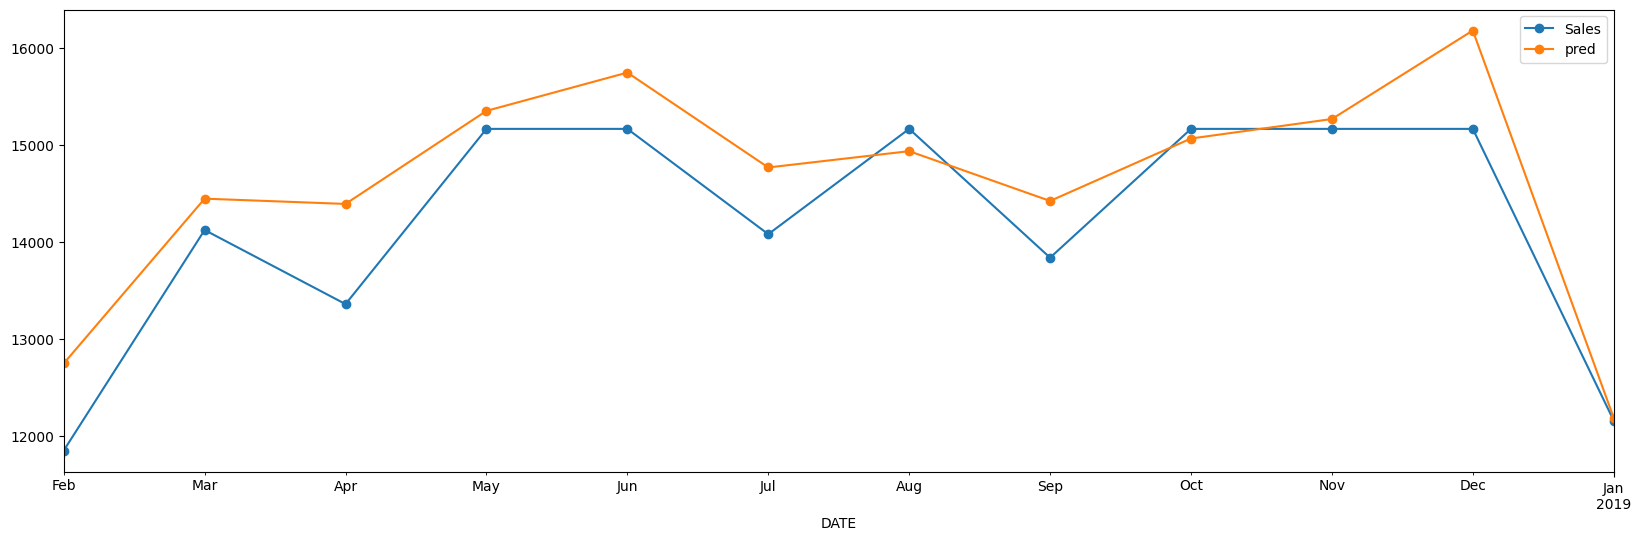

In [25]:
test_x['pred'] = pred.values
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## Stationarity

In [26]:
##Dickey-Fuller test
## Returns 
#test statistic
# p-value
# etc.
sm.tsa.stattools.adfuller(mobile_sales.Sales)

(np.float64(0.196035642717155),
 np.float64(0.9720383666351422),
 12,
 204,
 {'1%': np.float64(-3.462818103072159),
  '5%': np.float64(-2.8758145932936805),
  '10%': np.float64(-2.574378674548251)},
 np.float64(3222.73044282947))

In [27]:
# H0: TS is not stationary
# H1: 

#Since it is not less than 0.95
#We accept the null hypothesis
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

np.float64(0.9720383666351422)

In [28]:
def adf_test(data, significance_level = 0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

In [29]:
adf_test(mobile_sales.Sales)

Sequence is not stationary


## Non-stationary to stationary

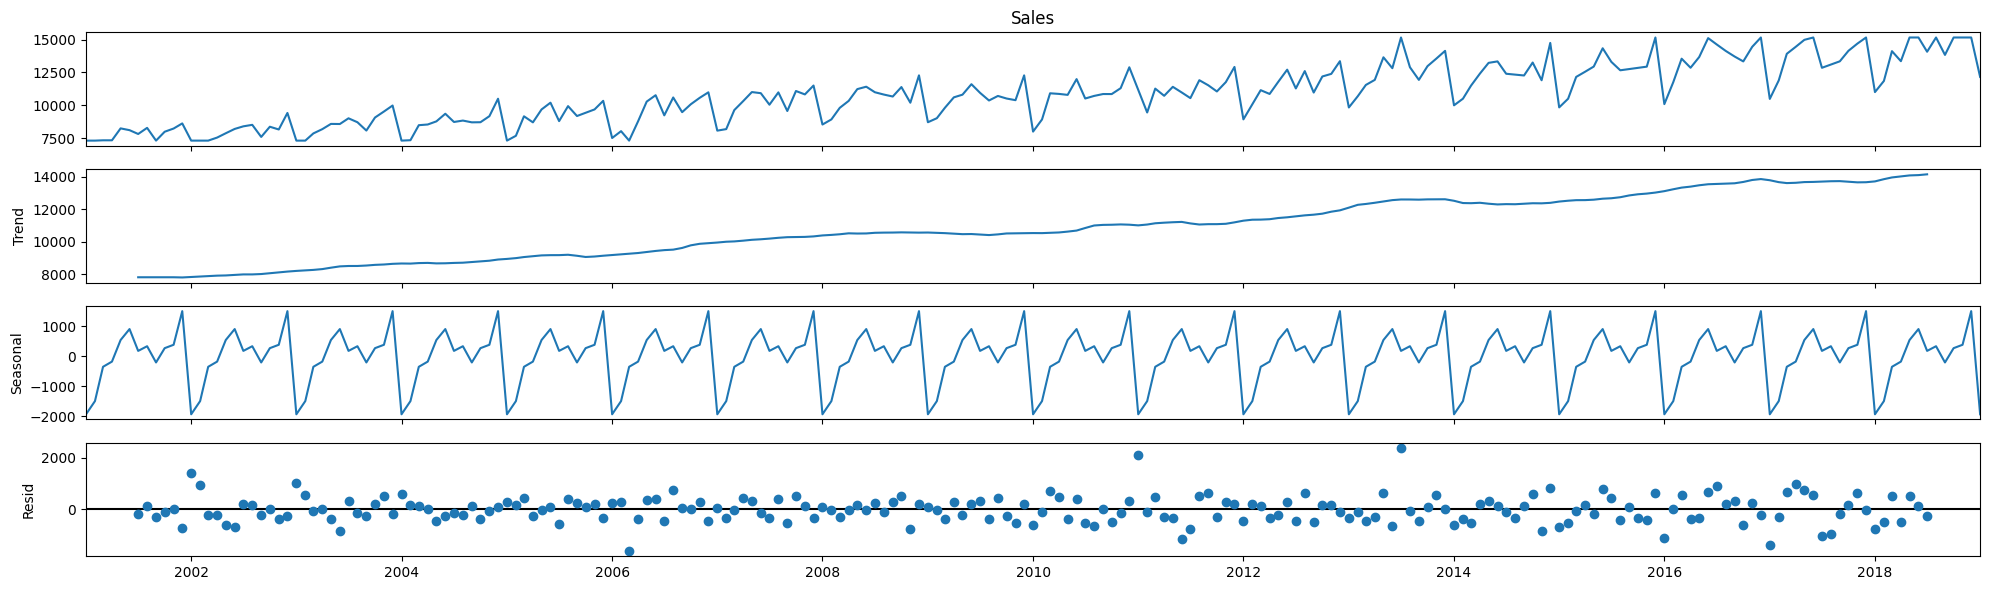

In [30]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')
model.plot();

<Axes: xlabel='DATE'>

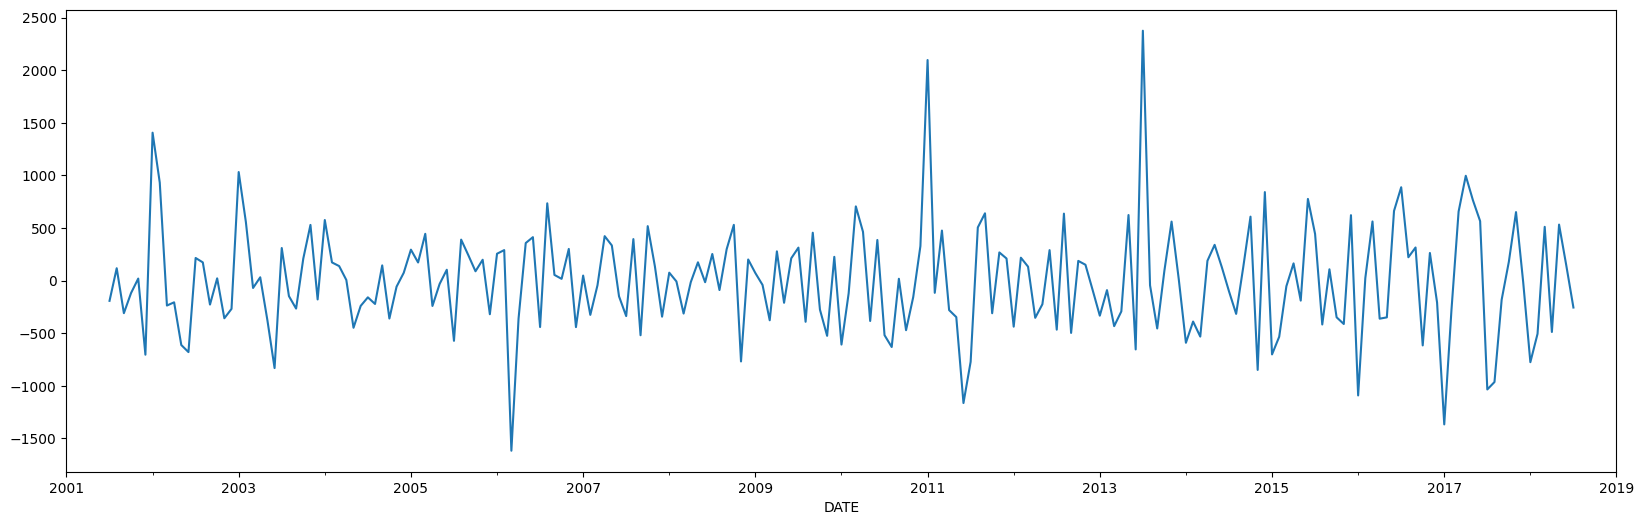

In [31]:
model.resid.plot()

In [32]:
#Bravo! Sequence is stationary! This can go into the ARIMA model
adf_test(model.resid.dropna())

Sequence is stationary


<Axes: xlabel='DATE'>

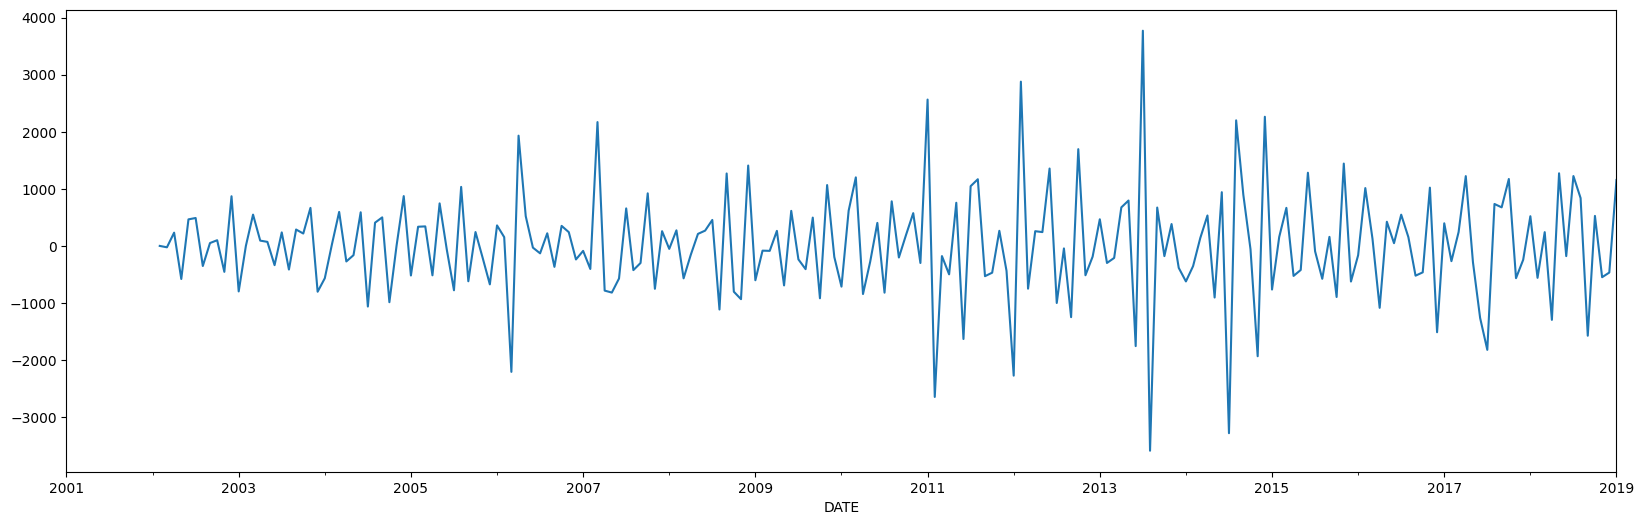

In [33]:
## Another way! Using differencing!
## .diff(1) removes trend
## .diff(12) removes seasonality
mobile_sales.Sales.diff(1).diff(12).plot()

In [34]:
adf_test(mobile_sales.Sales.diff(1).diff(12).dropna())

Sequence is stationary


## Autocorrelation

In [35]:
original = mobile_sales.Sales[1:]
shift_1 = mobile_sales.Sales.shift(1).dropna()
np.corrcoef(original, shift_1)

array([[1.        , 0.81071664],
       [0.81071664, 1.        ]])

In [36]:
## Keep going. At 12, corr is the highest!
original = mobile_sales.Sales[12:]
shift_1 = mobile_sales.Sales.shift(12).dropna()
np.corrcoef(original, shift_1)

array([[1.        , 0.94190985],
       [0.94190985, 1.        ]])

In [37]:
mobile_sales.Sales.shift(12).dropna()[0]

C:\Users\ryanr\AppData\Local\Temp\ipykernel_25112\1939624265.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mobile_sales.Sales.shift(12).dropna()[0]


np.float64(7307.8)

<StemContainer object of 3 artists>

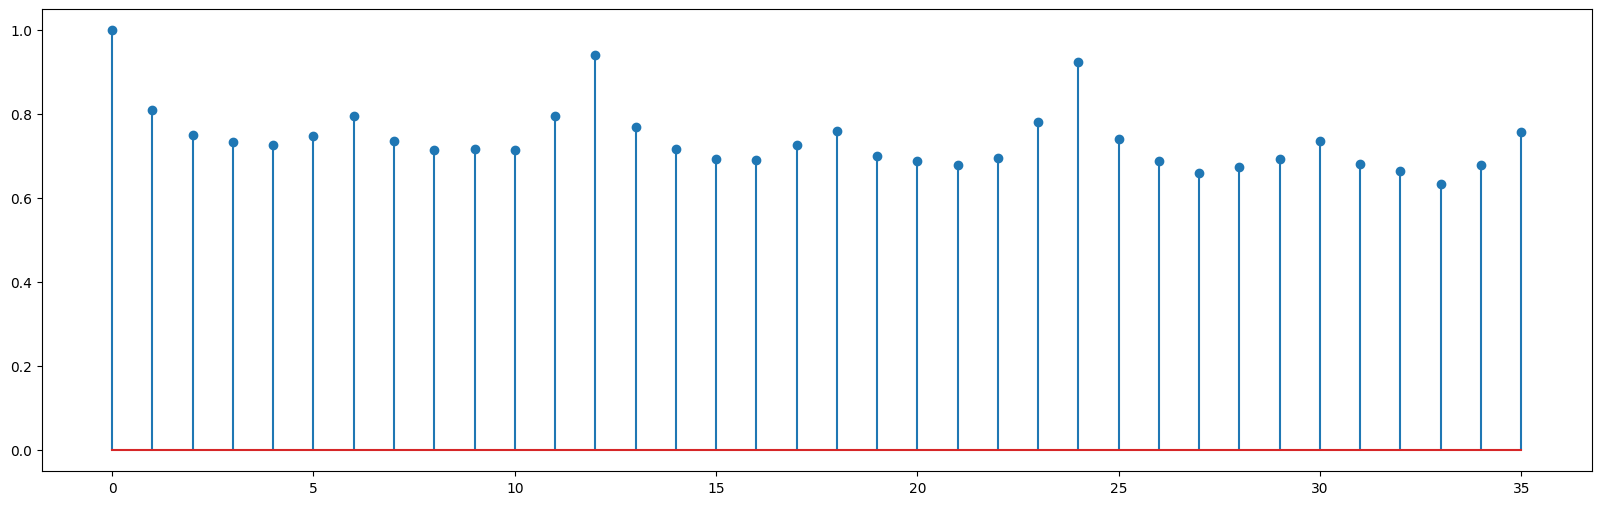

In [38]:
#Declare an empty corr array to store the shifted array
corr = []
for lag in range(36):
    corr.append(np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag).dropna())[0][1])

plt.stem(np.arange(36), corr)

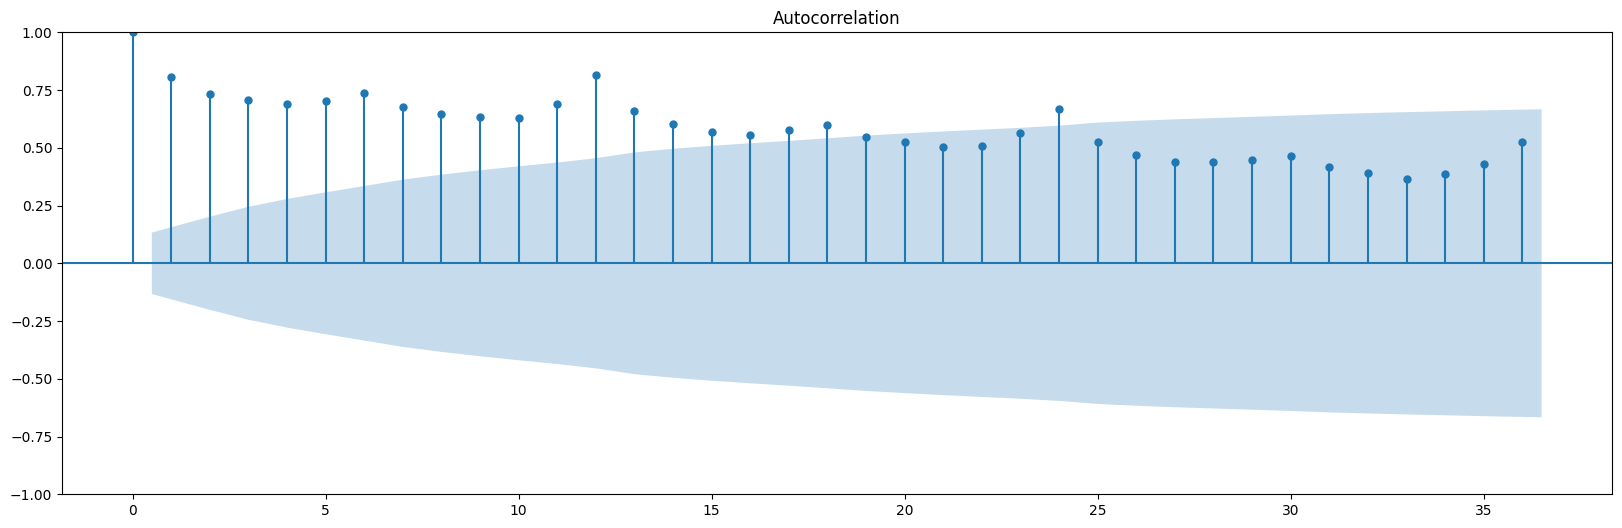

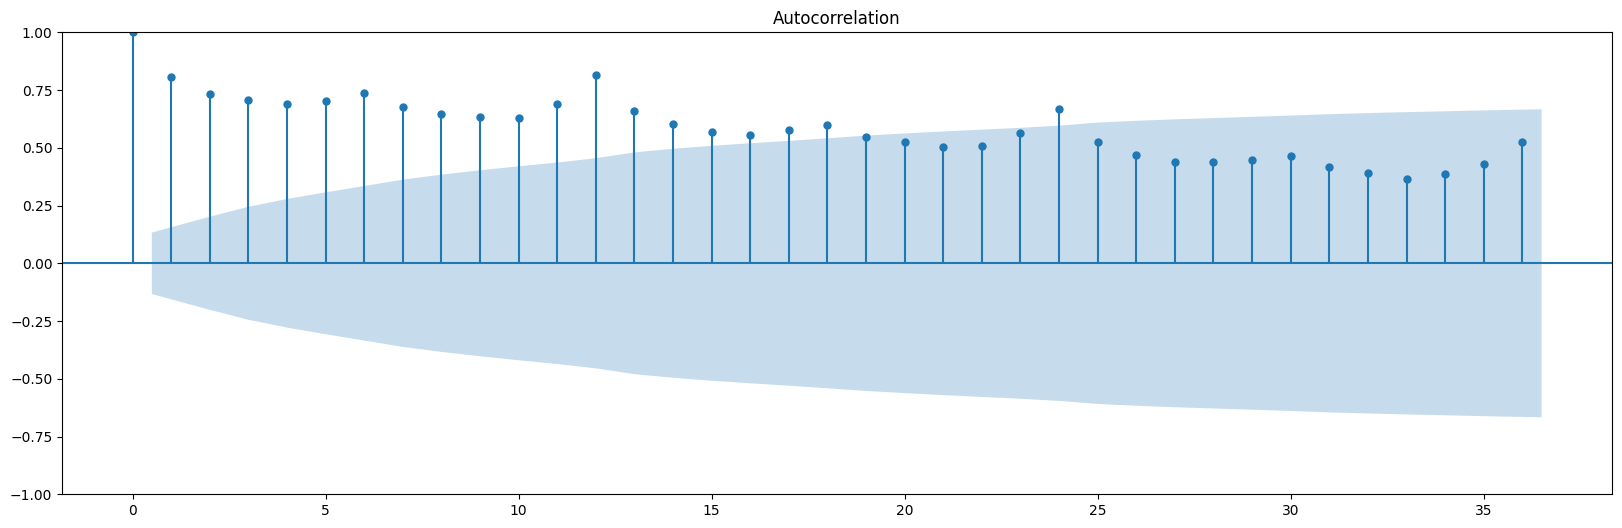

In [39]:
#Method 2 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mobile_sales.Sales, lags=36)